# <center> Astronomicala Data (Tabular) - Visualizations

## In this notebook, we shall cover ~
- Understand an Astronomical Tabular Data
- Create effective Visualizations using Matplotlib and Seaborn
- Understand why a specific Visualization is used for respective task


## Note
- You may have to re-run code cells whenever we change the style of the plots to exactly see the output!

## Exploring and Understanding the Star Type Data
- CSV data link:- https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-

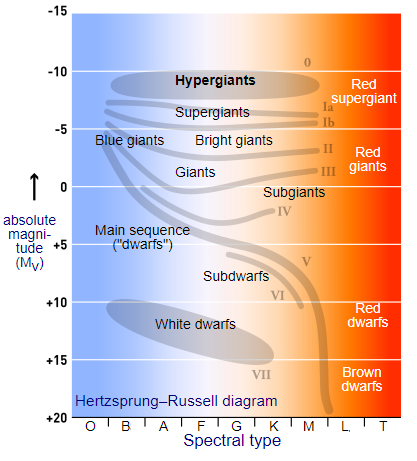

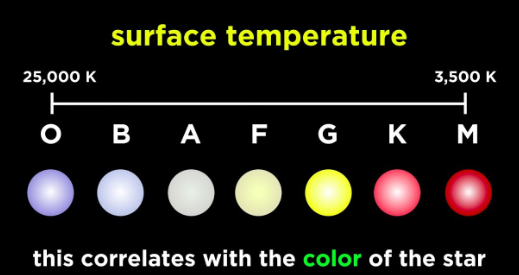

In [2]:
# Importing the libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Peek into the data by creating pandas dataframe
# star_df = pd.read_csv('https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-')
star_df = pd.read_csv('cleaned_star_data.csv')
star_df.sample(10) # Random 10 samples from star_df
# star_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
170,3570,320000.00000,1480.00000,-7.58,5,Red,M
33,9700,74.00000,2.89000,0.16,3,White,B
0,3068,0.00240,0.17000,16.12,0,Red,M
79,3158,0.00135,0.16100,13.98,1,Red,M
52,3834,272000.00000,1183.00000,-9.20,5,Red,M
117,3625,74000.00000,876.00000,-10.25,5,Red,M
209,19360,0.00125,0.00998,11.62,2,Blue,B
5,2840,0.00065,0.11000,16.98,0,Red,M
191,3257,0.00240,0.46000,10.73,1,Red,M
72,3304,0.00850,0.18000,13.20,1,Red,M


In [7]:
# Check general information about the dataframe
star_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [20]:
star_df.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

### Observations
**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
**2)** Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*

**3)** It consists of some different features of stars. Information on the star type is given below,       
- **0** → Brown Dwarf       
- **1** → Red Dwarf       
- **2** → White Dwarf      
- **3** → Main Sequence    
- **4** → Supergiants      
- **5** → Hypergiants      

### Create a directory to save different Visualizations

In [26]:
# Create a directory to save the visualizations
folder_name = 'star_plots'                     # Directory name
os.makedirs(folder_name, exist_ok=True)        # Create directory if not exisiting
base_dir = f'/content/{folder_name}/'          # (Google Colab) Store the path of this directory as base_dir to use it further
base_dir = f'{folder_name}/'                   # (Not using Colab)
base_dir

'star_plots/'

### Visualize the count of stars for each type of a star

Matplotlib

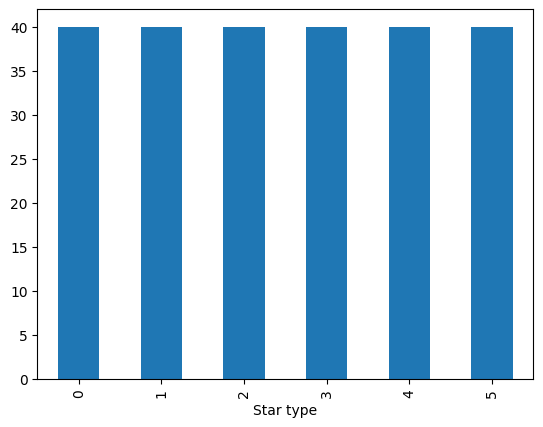

In [27]:
# Bar chart to visualize the count of stars with respective type
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

# MatPlotLib Style Sheets

matplotlib.style.available

In [77]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

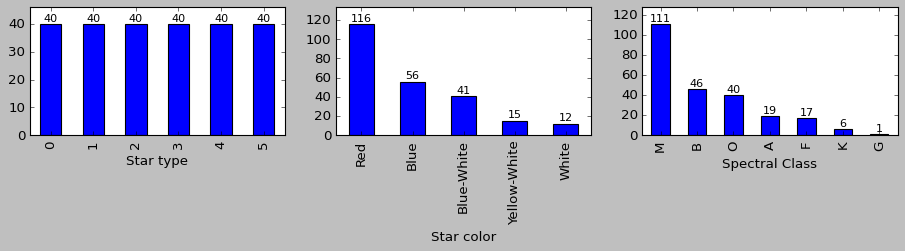

In [153]:
# plt.style.use('default')
plt.style.use('classic')
# plt.style.use('dark_background')
fig, axs = plt.subplots(1, 3, figsize=(14, 2))
cat_cols = ['Star type', 'Star color', 'Spectral Class']
for index, cat_col in enumerate(cat_cols):
    ax = axs[index]
    ax.margins(y=0.15) # pad the spacing between the label and the top edge of the figure
    star_df[cat_col].value_counts().plot(kind='bar', ax=ax)
    ax.bar_label(ax.containers[0], label_type='edge', color='black', rotation=0, fontsize=10, padding=1)
# plt.tight_layout() # Required to save the figure correctly.
plt.savefig(base_dir + 'categorical_columns.png', bbox_inches = "tight", facecolor=fig.get_facecolor()) # dpi=300
plt.show() 

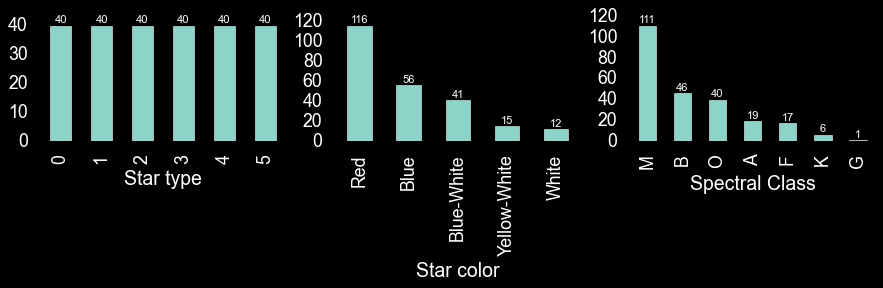

In [113]:
# plt.style.use('default')
# plt.style.use('classic')
plt.style.use('dark_background')
fig, axs = plt.subplots(1, 3, figsize=(12, 2))
cat_cols = ['Star type', 'Star color', 'Spectral Class']
for index, cat_col in enumerate(cat_cols):
    ax = axs[index]
    ax.margins(y=0.15) # pad the spacing between the label and the top edge of the figure
    star_df[cat_col].value_counts().plot(kind='bar', ax=ax)
    ax.bar_label(ax.containers[0], label_type='edge', color='white', rotation=0, fontsize=10, padding=1)
plt.show() 

### Customize the above plot and save it
- Adjust the size of the figure according to your convinience
- Add the value of counts on top of bars
- Set the background to dark
- Change the color of each bar
- Add a title
- Add y label and change color of y ticks
- Replace x ticks from 0, 1, 2, 3, 4, 5 to respective names of star type
- Save the plots in base directory

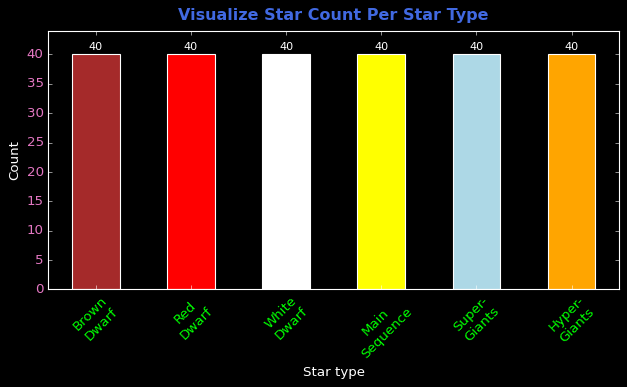

In [145]:
# Customize the plot
plt.style.use('dark_background')
plt.figure(figsize=(8, 5))
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'white', 'yellow', 'lightblue', 'orange'])
ax.bar_label(ax.containers[0], label_type='edge', color='white', rotation=0, fontsize=10, padding=2)
ax.margins(y=0.1)
plt.title('Visualize Star Count Per Star Type', color='royalblue', weight='bold', pad=10)
plt.yticks(color='tab:pink')
plt.ylabel('Count', color='white', fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], rotation=45, color='lime',
           labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Super-\nGiants', 'Hyper-\nGiants'])
plt.tight_layout() # Required to save the figure correctly.
plt.savefig(base_dir + 'barplot_star_count.png')
plt.show() 

### Use seaborns barplot to compare it with the above bar chart
(Matplotlib + Seaborn)

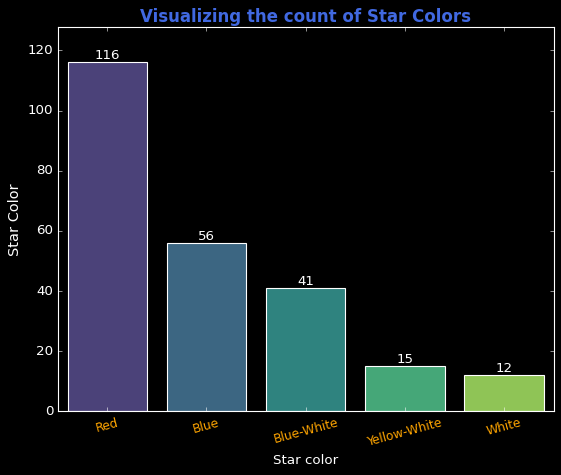

In [180]:
# Visulaising the Star color data
plt.style.use('dark_background')
data = star_df['Star color'].value_counts()
ax = sns.barplot(
            x=data.index,       # color names
            y=data,             # star counts
            hue=data.index,     # 
            legend=False,       # 
            palette='viridis')  # 
# ax.bar_label(ax.containers[0], color='red', weight='bold')
# ax.bar_label(ax.containers[0], label_type='edge', color='red', weight='bold', rotation=0, fontsize=10, padding=2)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')
ax.margins(y=0.1)
plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
plt.xticks(rotation=15, color='orange', fontsize=11)
plt.ylabel('Star Color', color='white', fontsize=13)
# plt.yticks(color='tab:pink')
plt.savefig(base_dir + 'star_colors_viz.png', bbox_inches = "tight") # , facecolor=fig.get_facecolor())
plt.show() 

- So you see how seaborn is built on matplotlib? It is using all functionalities of matplotlib to customise it the way you want.

- Moreover, it makes it easy for us to do customizations too!

### Visualize outliers if any by creating boxplots for numeric features
- We will be creating subplot for all the numeric features.
- When we create multiple plots inside one figure that is what we refer to as the subplot.
- It needs to know how many rows and columns to use to create different plots.
- ```plt.subplot(rows, cols, position)``` here position indicates out of all the rows & columns, which position to plot in.
- For example, ```plt.subplot(2, 3, 2)``` means that create a plot on the second postion of 6 available positions.

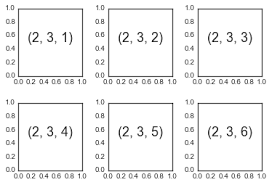

In [201]:
# Get a gist of the data again by checking the top 5 rows of the data
star_df.sample(10)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
116,4015,282000.00000,1534.0000,-11.390,5,Red,K
19,3441,0.03900,0.3510,11.180,1,Red,M
193,3212,0.00160,0.3780,12.854,1,Red,M
26,8570,0.00081,0.0097,14.200,2,Blue-White,A
8,2650,0.00069,0.1100,17.450,0,Red,M
48,3625,184000.00000,84.0000,-6.740,4,Red,M
210,22350,12450.00000,6.3600,-3.670,3,Blue-White,B
15,3340,0.00380,0.2400,13.070,1,Red,M
229,21738,748890.00000,92.0000,-7.346,4,Blue,O
125,3225,0.00076,0.1210,19.630,0,Red,M


- First four columns is what we are looking for.
- We can have a subplot with 1 row and 4 columns to visualize this.

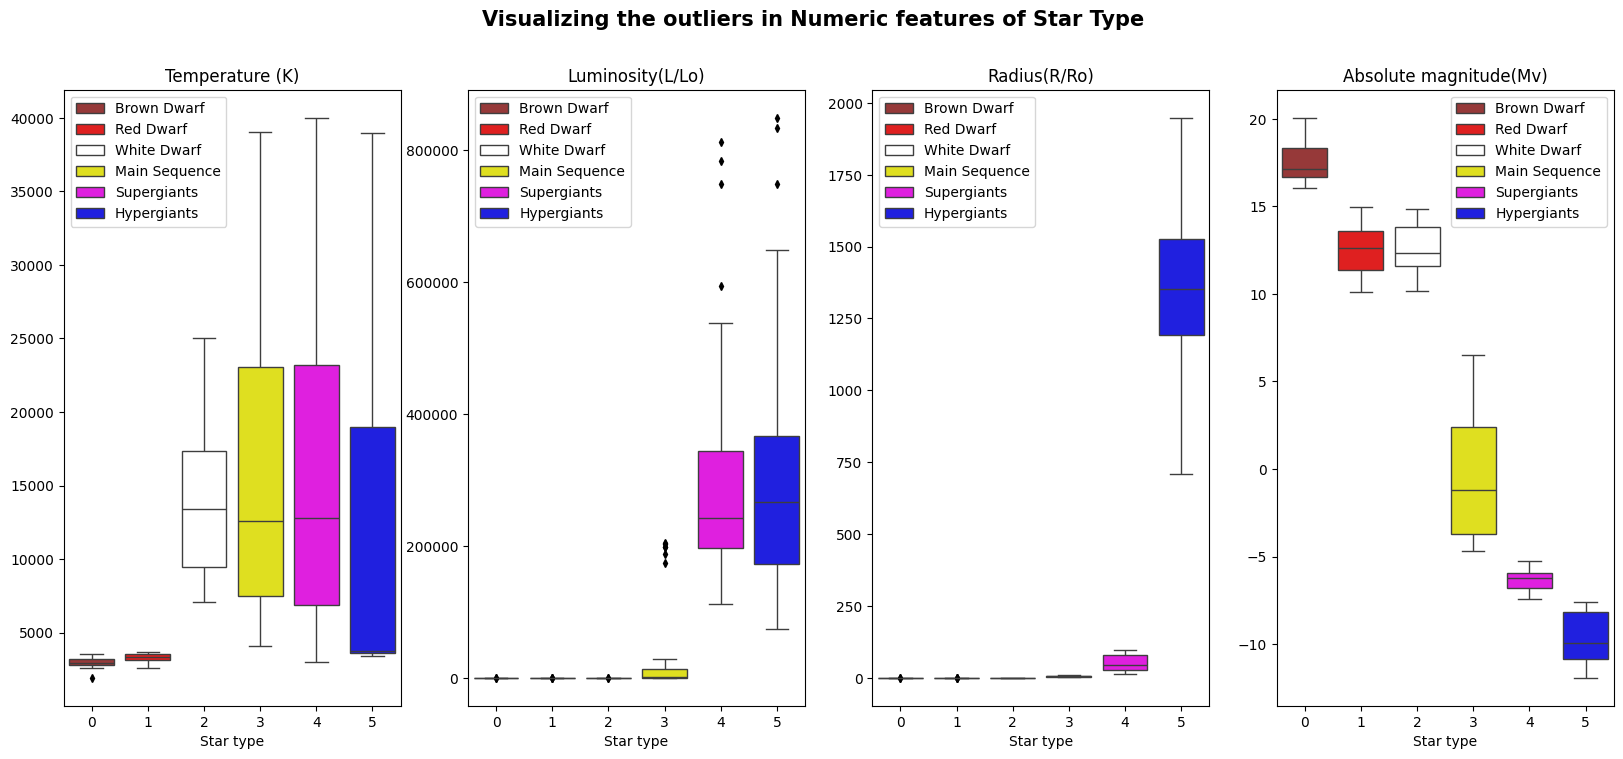

In [211]:
# Visualize Outliers in the Data
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
    color='black', weight='bold', fontsize=15)
palette = {0: "brown", 1: "red", 2: "white", 3: "yellow", 4: "magenta", 5: "blue"}
my_labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiants', 'Hypergiants']

# 0 → Brown Dwarf
# 1 → Red Dwarf
# 2 → White Dwarf
# 3 → Main Sequence
# 4 → Supergiants
# 5 → Hypergiants

# Using for loop to easily repeat some steps to create subplot
for i in range(4):
  plt.subplot(1, 4, i + 1)
  ax = sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i], hue=star_df['Star type'], palette=palette, legend=True, orient='v',
            flierprops = dict(marker='d', markerfacecolor='black', markersize=4, markeredgecolor='black'))
  handles, labels = ax.get_legend_handles_labels() # Get the artists.
  ax.legend(handles, my_labels) #, loc="best")
  plt.title(star_df.columns[i]) # , color='red')
  plt.ylabel('')

# Saving the figure
plt.savefig(base_dir + 'boxplot_star_type.png') 

**0** → Brown Dwarf      
**1** → Red Dwarf       
**2** → White Dwarf       
**3** → Main Sequence      
**4** → Supergiants      
**5** → Hypergiants

- With respect to star type we can see the statistical distribution of the numerical features.

### Create lineplots
- Show how the values are distributed for each of the numeric features.
- Again create a subplot but now with 4 rows and 1 col.

In [217]:
def line_subplot(star_df, colors, i):
  """
  This will create subplot within a for loop

  Parameters
  ----------
  - star_df: data frame
  - colors: colors to display on plot
  - i: index of the iteration

  Generates
  ---------
  - subplot on all axes with respective plots and titles
  """
  plt.subplot(4, 1, i + 1)
  plt.plot(star_df.iloc[:,i], color=colors[i])
  plt.title(star_df.columns[i], color='red') 

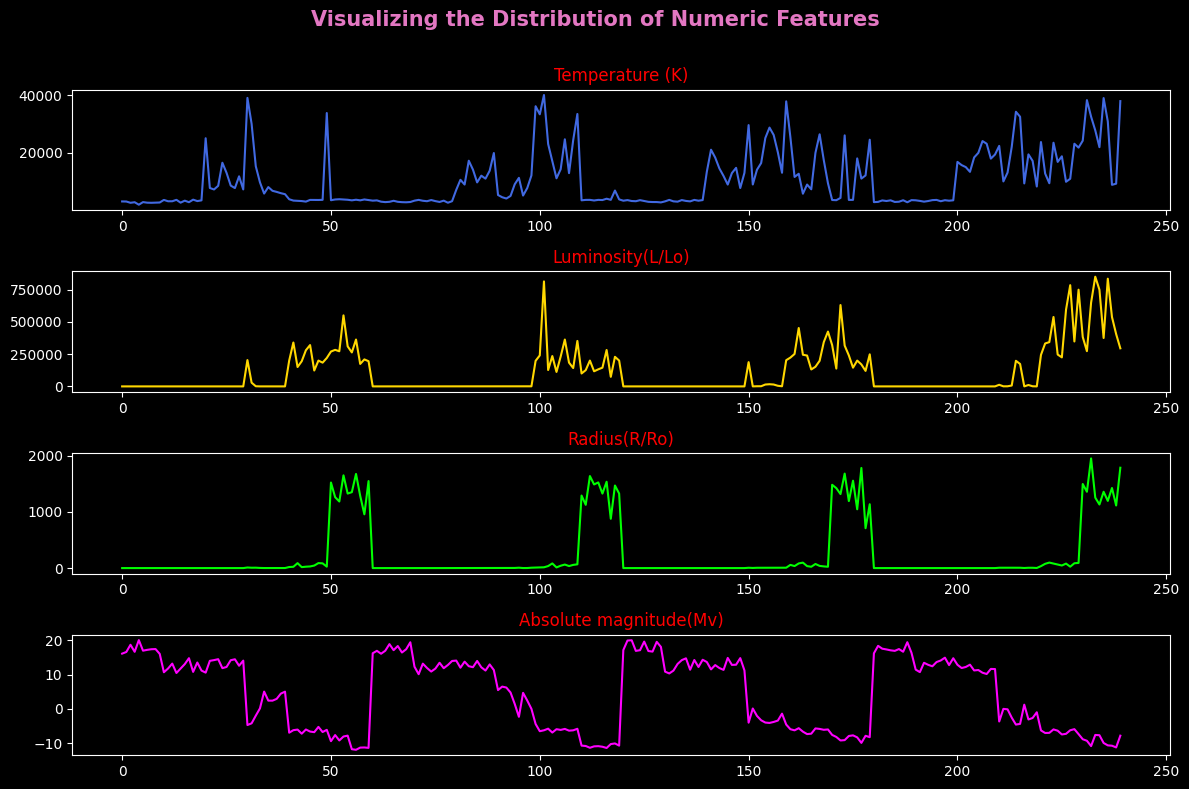

In [219]:
# Line Plots
plt.style.use('dark_background')

# Colors to add in line plots
colors = ['royalblue', 'gold', 'lime', 'magenta']

# Add figure size and title to subplot
plt.figure(figsize=(12,8))
plt.suptitle('Visualizing the Distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

# Use for loop and call the function that creates subplot of line plots
for i in range(4):
  line_subplot(star_df, colors, i)

# Use tight_layout() to automatically adjust the spacing in subplot
plt.tight_layout()

# Save the figure
plt.savefig(base_dir + 'line_subplot.png')
plt.show() 

### Create a pairplot
- **A pairplot compares every combination of two numeric columns.**
- **Categorical columns are ignored, except the hue (color) column.**
- It will give you the scatter plot by default and you can change the kind of plot you want for of all variables with each other.
- It gives all the plots together without using subplot manually.
- That's the power of seaborn! But it has a disadvantages as well.
- If you have a lot more features in your dataset then it would be too time consuming to run this, plus it won't be properly visible.
- However, as we have less features so let's obtain scatter pairplot with hue being set to Spectral Class.
- Hue will allow us to compare two different features with respect to the spectral class.

In [221]:
star_df.sample(3)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
215,32460,173800.0000,6.237,-4.36,3,Blue,O
47,3574,200000.0000,89.000,-5.24,4,Red,M
60,3341,0.0056,0.057,16.23,0,Red,M


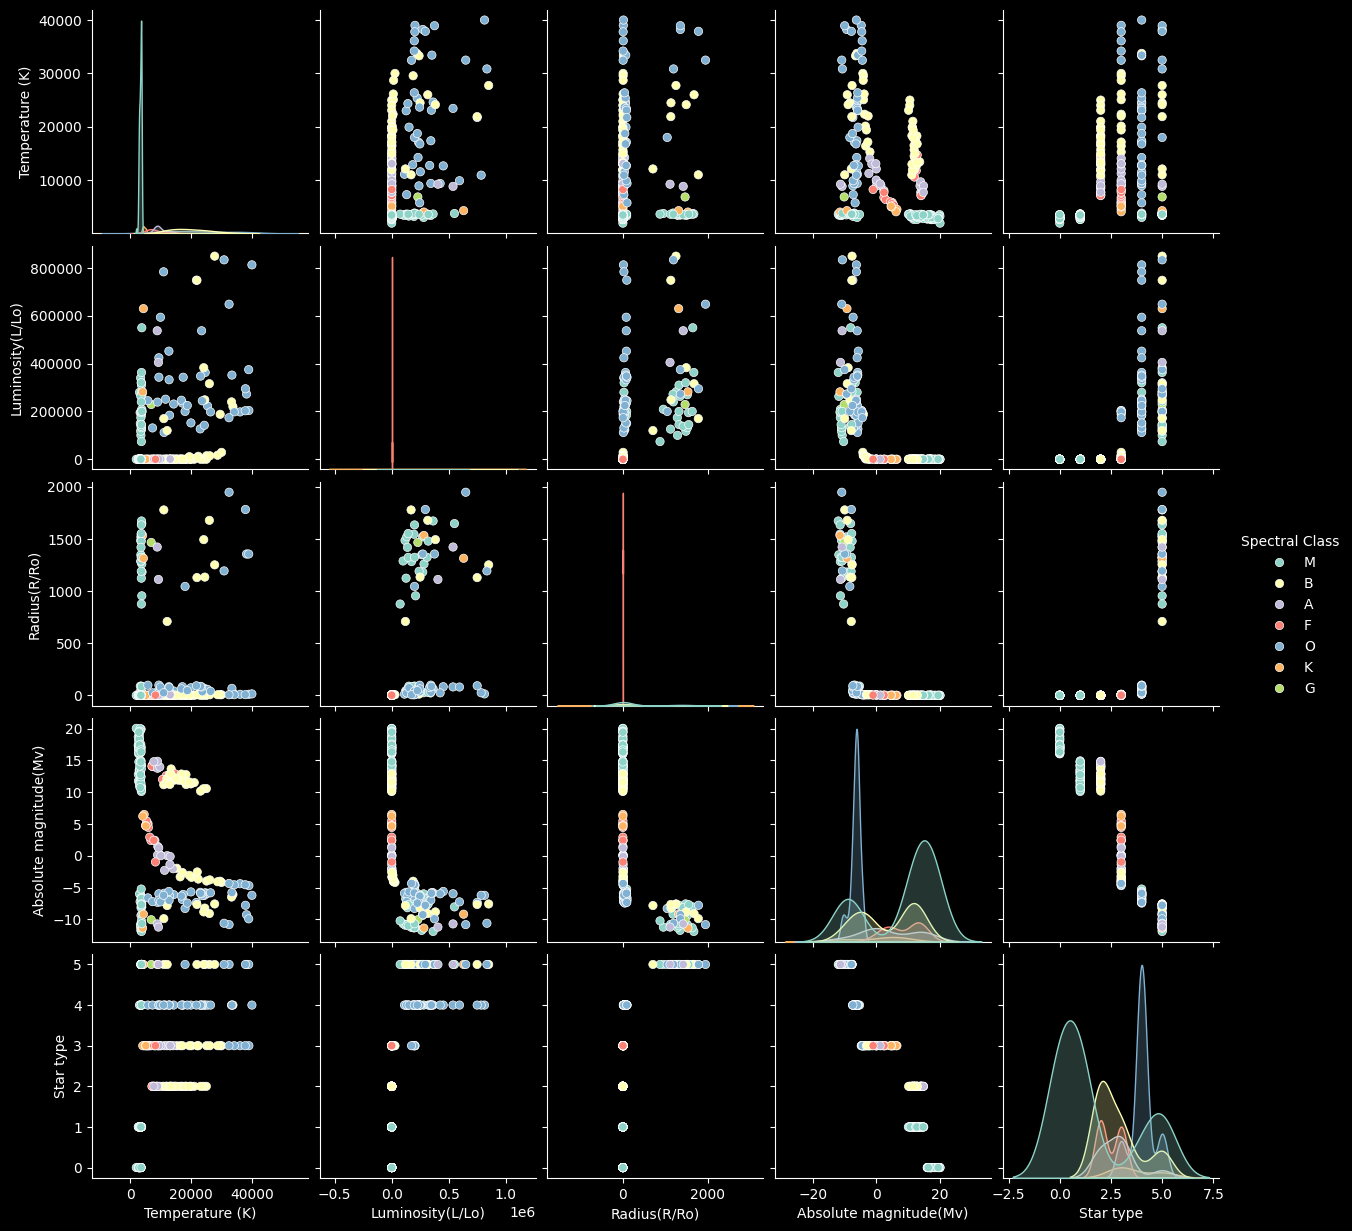

In [224]:
# Get a pairplot - scatter
# plt.style.use('default')
plt.style.use('dark_background')
sns.pairplot(star_df, hue='Spectral Class', kind='scatter') # {'scatter', 'kde', 'hist', 'reg'}
plt.savefig(base_dir + 'pairplot.png')
plt.show() 

### Create a scatter plot of HR diagram
- Using the information we have in our star_df let us try to create something like this:-
<img src = 'https://www.space.fm/astronomy/images/diagrams/hr.jpg'>

**0** → Brown Dwarf      
**1** → Red Dwarf       
**2** → White Dwarf       
**3** → Main Sequence      
**4** → Supergiants      
**5** → Hypergiants

In [247]:
# Arrays to be used in the for loop
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

# Python dictionaries --> Made of key value pairs --> Used to get properties of each star_type
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Super Giants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hyper Giants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

print(len(star_type))
print(star_type)
print(star_types[3])
print(star_types[3]['color'])

240
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5
 5 5 5 5 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4
 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5]
{'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'}
cyan


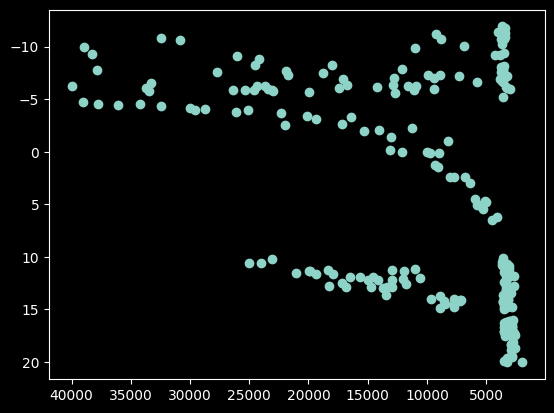

In [248]:
plt.scatter(temperature, abs_mag)
plt.gca().invert_xaxis() # gca() = get current axis
plt.gca().invert_yaxis()
plt.show() 

{'Hyper Giants', 'Red Dwarf', 'Main Sequence', 'Brown Dwarf', 'Sun', 'White Dwarf', 'Super Giants'}


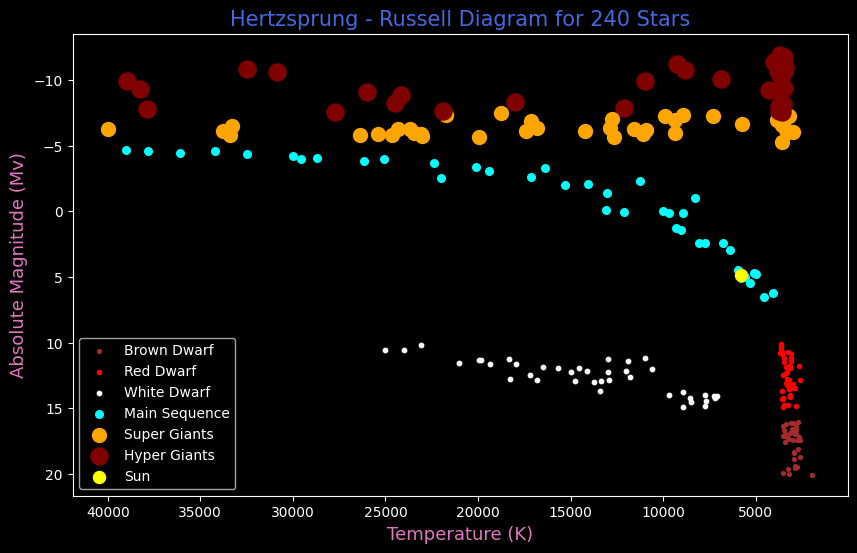

In [249]:
# Plotting a HR Diagram for Temp vs Abs mag

# Empty list and set to store ax and label of star_type
axes = []
labels = set()

plt.figure(figsize=(10, 6))

# For each and every star in the data
for i in range(len(star_type)):

  # Get its properties with its star_type from python dictonary
  properties = star_types[star_type[i]]

  # Generate the plot
  ax = plt.scatter(temperature[i], abs_mag[i],
                   s=properties['size'],
                   c=properties['color'],
                   marker=properties['marker'],
                   label=properties['label'])

  # If label is not present in set labels
  if properties['label'] not in labels:
        # Add it to axes list
        axes.append(ax) 
        # Also add label to the labels set
        labels.add(properties['label'])

# Add data for the Sun
ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

# Add title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue')

# Add labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')

# Include legend labels only for the specific axes handles
plt.legend(handles=axes)

# Invert the axes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

print(labels)

# Save Figure
plt.savefig(base_dir + 'hr_diagram.png')
plt.show() 

- So there we have it, isn't it just looking beautiful!
- You have succesfully created some basic to advanced visualizations using Python in today's session on a tabular data.


## Extract the output folders
- That's it, we are done creating multiple visualizations using two different data.
- Let's extract them and save it in your system.

In [ ]:
'''This shall work only in Google Colab'''
from google.colab import files                            # import files from colab module of google
!zip -r /content/star_plots.zip /content/star_plots       # create a zip file of the folder in the same location where we created the base directory
files.download('/content/star_plots.zip')                 # download the zip file

  adding: content/star_plots/ (stored 0%)
  adding: content/star_plots/line_subplot.png (deflated 5%)
  adding: content/star_plots/star_colors_viz.png (deflated 8%)
  adding: content/star_plots/hr_diagram.png (deflated 6%)
  adding: content/star_plots/.ipynb_checkpoints/ (stored 0%)
  adding: content/star_plots/pairplot.png (deflated 3%)
  adding: content/star_plots/barplot_star_count.png (deflated 8%)
  adding: content/star_plots/boxplot_star_type.png (deflated 20%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---



# <center> THE END